In [2]:
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng
import numpy as np
rng = default_rng(0)
rvs = stats.poisson(2, loc=0).rvs
S = random(10, 100, density=0.05, random_state=rng, data_rvs=rvs, dtype=np.int0)
S.A


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

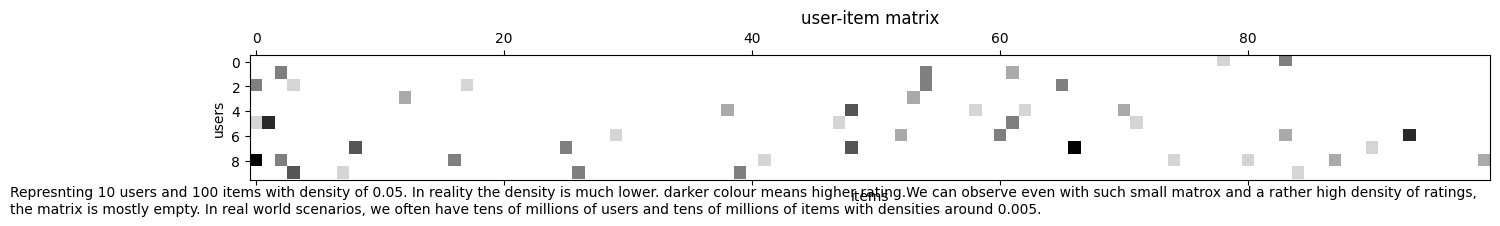

In [174]:
import matplotlib.pyplot as plt
plt.matshow(S.A)
plt.set_cmap('gray_r')
plt.title('user-item matrix')
plt.figtext(0,0, 'Represnting 10 users and 100 items with density of 0.05. In reality the density is much lower. darker colour means higher rating.\
We can observe even with such small matrox and a rather high density of ratings, \nthe matrix is mostly empty. In real world scenarios, we often have \
tens of millions of users and tens of millions of items with densities around 0.005.')
plt.xlabel('items')
plt.ylabel('users')
plt.savefig('../images/mf1.png')
plt.show()


In [138]:
import networkx as nx
from networkx.algorithms import bipartite

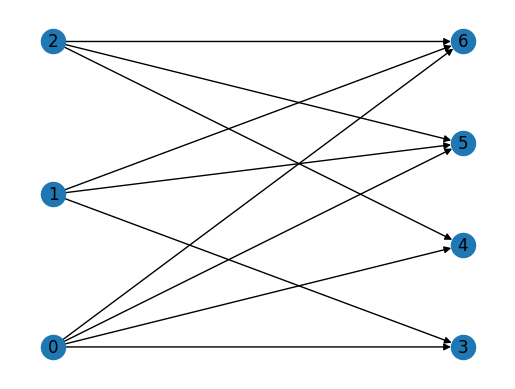

In [139]:
G = nx.bipartite.gnmk_random_graph(3, 4, 10, directed=True, seed=123)
top = nx.bipartite.sets(G)[0]
pos = nx.bipartite_layout(G, top)
nx.draw_networkx_labels(G, pos)
nx.draw(G,pos=pos)

In [140]:
from random import randint
for i, edge in enumerate(G.edges()):
    G[edge[0]][edge[1]]['weight'] = randint(1,5)

In [141]:
G.edges(data=True)

OutEdgeDataView([(0, 5, {'weight': 5}), (0, 6, {'weight': 3}), (0, 4, {'weight': 3}), (0, 3, {'weight': 3}), (1, 3, {'weight': 1}), (1, 5, {'weight': 4}), (1, 6, {'weight': 5}), (2, 5, {'weight': 4}), (2, 4, {'weight': 2}), (2, 6, {'weight': 1})])

In [142]:
nodes = {0: "u1", 1: "u2", 2: "u3", 3: "i1", 4: "i2", 5: "i3", 6: "i4"}
G = nx.relabel_nodes(G, nodes)

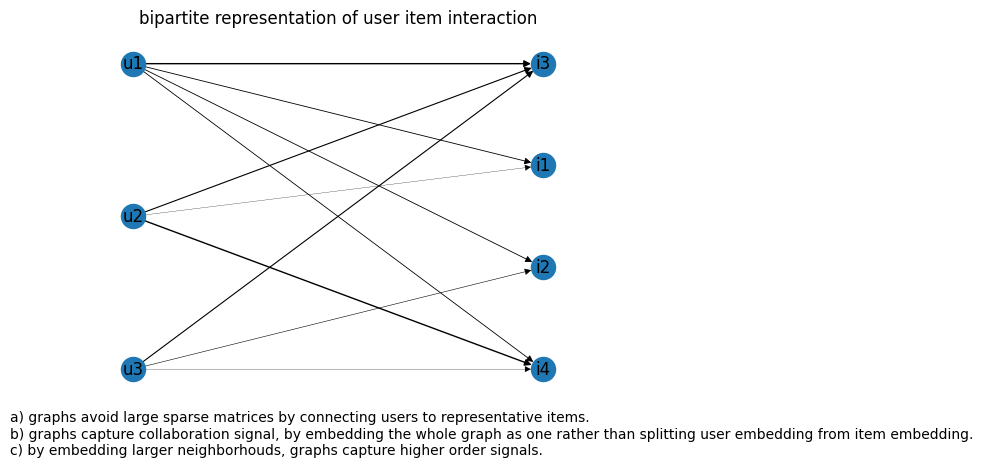

In [162]:
weights = [G[u][v]['weight']/5 for u,v in G.edges()]

top = nx.bipartite.sets(G)[0]
pos = nx.bipartite_layout(G, top)
nx.draw_networkx_labels(G, pos)
#nx.draw_networkx_edge_labels(G, pos)
nx.draw(G,pos=pos,width=weights)
plt.title("bipartite representation of user item interaction")
plt.figtext(0,0, "a) graphs avoid large sparse matrices by connecting users to representative items. \n\
b) graphs capture collaboration signal, by embedding the whole graph as one rather than splitting user embedding from item embedding.\n\
c) by embedding larger neighborhouds, graphs capture higher order signals.")
plt.savefig('../images/bipartiteCF')
plt.show()

In [175]:
l = "0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52"
l = l.strip("\n").split(" ")

In [180]:
user_item_src = []
user_item_dst = []
uid = int(l[0])
items = [int(i) for i in l[1:]]
for i in l[1:]:
    user_item_src.append(uid)
    user_item_dst.append(int(i))

In [183]:
len(items)

53